In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Dislpay floating point upto 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [2]:
loan_df = pd.read_csv('loan/loan.csv')
print(loan_df)
print(loan_df.shape)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000          4975.00   
1      1077430    1314167       2500         2500          2500.00   
2      1077175    1313524       2400         2400          2400.00   
3      1076863    1277178      10000        10000         10000.00   
4      1075358    1311748       3000         3000          3000.00   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500          1075.00   
39713    90665      90607       8500         8500           875.00   
39714    90395      90390       5000         5000          1325.00   
39715    90376      89243       5000         5000           650.00   
39716    87023      86999       7500         7500           800.00   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%     

c:\users\sravi1\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning

In [3]:
#Manual validation to identify columns which will not be useful for analysis. But in case of extremely large data sets it is not efficient/practical to follow a manual process, so let's go with the below approach which is a bit more dynamic.
#loan_df = loan_df.drop(columns=['acc_open_past_24mths','desc','title','url','pymnt_plan','policy_code','mths_since_last_major_derog','collections_12_mths_ex_med','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','initial_list_status'])
#loan_df.shape

# Drop columns with all NA values
loan_df_1 = loan_df.dropna(axis=1, how='all')  
# Drop columns with the same value for all entries
loan_df_1 = loan_df_1.loc[:, loan_df_1.nunique() > 1]  

# Print the remaining columns
print(loan_df_1.columns.tolist())
print(loan_df_1.shape)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies']
(39717, 48)


In [4]:
#List columns where all data is missing
missing_cols = loan_df_1.columns[100*(loan_df_1.isnull().sum()/len(loan_df_1)) > 90]
missing_cols

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [5]:
# Drop all missing columns
loan_df_1 = loan_df_1.drop(missing_cols, axis =1 )
loan_df_1.shape

(39717, 46)

In [6]:
# Calculate the percentage of missing values in each row
missing_percentages_rows = loan_df_1.isnull().mean(axis=0) * 100

# Filter rows where more than 90% of data is missing
rows_to_drop = missing_percentages_rows[missing_percentages_rows > 90].index

# Drop the rows from the DataFrame
loan_df_1 = loan_df_1.drop(rows_to_drop)
loan_df_1.shape

(39717, 46)

In [7]:
loan_df_1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


In [8]:
# List of columns to work with 
print(loan_df_1.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies']


## Data Cleaning / Normalization

In [9]:
#Numeric mapping for loan status for ease of plotting on graphs
status_mapping = {
    'Fully Paid': 0,
    'Charged Off': 1,
    'Current': 2
}
loan_df_1['loan_status_numeric'] = loan_df_1['loan_status'].map(status_mapping)

In [10]:
loan_df_1['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [11]:
# Remove "months" and convert to integer value for ease of plotting graphs
loan_df_1['term'] = loan_df_1['term'].str.replace(' months', '').astype(int)
loan_df_1['term'].value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [12]:
# Remove "%" and convert to float
loan_df_1['int_rate'] = loan_df_1['int_rate'].str.replace('%', '').astype(float)
loan_df_1['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
17.54      1
17.44      1
20.52      1
24.59      1
17.34      1
Name: int_rate, Length: 371, dtype: int64

In [13]:
# Remove "%" and convert to float
loan_df_1['revol_util'] = loan_df_1['revol_util'].str.replace('%', '').astype(float)
loan_df_1['revol_util'].value_counts()

0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
70.94      1
8.49       1
77.63      1
10.17      1
24.66      1
Name: revol_util, Length: 1089, dtype: int64

In [14]:
# Remove "%" and convert to float
loan_df_1['emp_length_num'] = loan_df_1['emp_length']
loan_df_1['emp_length_num'] = loan_df_1['emp_length_num'].str.replace(' years', '')
loan_df_1['emp_length_num'] = loan_df_1['emp_length_num'].str.replace('< 1 year', '0.9')
loan_df_1['emp_length_num'] = loan_df_1['emp_length_num'].str.replace('1 year', '1')
loan_df_1['emp_length_num'] = loan_df_1['emp_length_num'].str.replace('10\+', '11')
loan_df_1['emp_length_num'] = loan_df_1['emp_length_num'].astype(float)
loan_df_1['emp_length_num'].value_counts()

11.00    8879
0.90     4583
2.00     4388
3.00     4095
4.00     3436
5.00     3282
1.00     3240
6.00     2229
7.00     1773
8.00     1479
9.00     1258
Name: emp_length_num, dtype: int64

## Derived Metrics

In [15]:
# Identify all records which fall under 100000 for Annual income category and mark them as True for low income as this seems a possible factor to assess for loan credibility
loan_df_1['low_income'] = loan_df_1['annual_inc'] < 100000

In [16]:
# Total credit revolving balance / Annual income. Good candidate for loan credibility factor. If high then providing loan to such candidates can be risky
loan_df_1['TRB_AI'] = (loan_df_1['revol_bal'] // loan_df_1['annual_inc']) * 100
loan_df_1['TRB_AI'] = loan_df_1['TRB_AI'].astype(int)

In [17]:
#Annual interest amount
loan_df_1['annual_int_amnt'] = loan_df_1['loan_amnt'] * (loan_df_1['int_rate'] / 100)

In [18]:
#Interest to income percentage
loan_df_1['interest_to_income'] = (loan_df_1['annual_int_amnt'] / loan_df_1['annual_inc']) * 100

## Univariate Analysis

In [19]:
#Starting with Annual income
loan_df_1['annual_inc'].describe()

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

In [20]:
#Remove Outliers
print((loan_df_1['annual_inc'] == 6000000).sum())
loan_df_1 = loan_df_1[loan_df_1['annual_inc'] != 6000000]
loan_df_1['annual_inc'].describe()

1


count     39716.00
mean      68819.59
std       56426.82
min        4000.00
25%       40403.00
50%       59000.00
75%       82300.00
max     3900000.00
Name: annual_inc, dtype: float64

count   39716.00
mean    11219.60
std      7456.70
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64


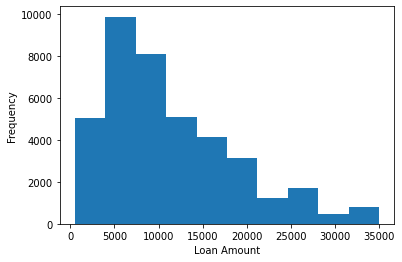

In [21]:
print(loan_df_1['loan_amnt'].describe())
plt.hist(loan_df_1['loan_amnt'])
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

count   39716.00
mean       12.02
std         3.72
min         5.42
25%         9.25
50%        11.86
75%        14.59
max        24.59
Name: int_rate, dtype: float64


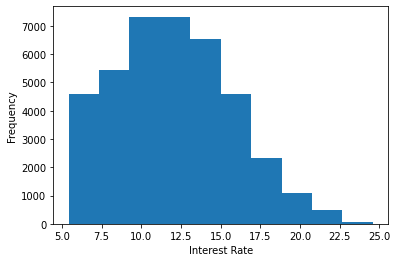

In [22]:
print(loan_df_1['int_rate'].describe())
plt.hist(loan_df_1['int_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis

In [23]:
# Before starting, Let's create separate datasets for Fully paid and Charged off customers for ease of comparison and validation
charged_off_df = loan_df_1[loan_df_1['loan_status'] == "Charged Off"]
charged_off_df.shape

(5627, 52)

In [24]:
fully_paid_df = loan_df_1[loan_df_1['loan_status'] == "Fully Paid"]
fully_paid_df.shape

(32949, 52)

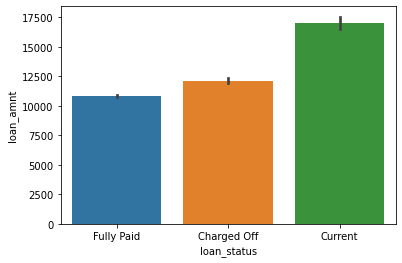

Fully Paid: 
count   32949.00
mean    10866.63
std      7199.67
min       500.00
25%      5200.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64
Charged Off: 
count    5627.00
mean    12104.39
std      8085.73
min       900.00
25%      5600.00
50%     10000.00
75%     16500.00
max     35000.00
Name: loan_amnt, dtype: float64


In [25]:
# Loan amount vs Loan Status
sns.barplot(x='loan_status',y='loan_amnt',data=loan_df_1)
plt.show()
print(f"Fully Paid: \n{fully_paid_df['loan_amnt'].describe()}")
print(f"Charged Off: \n{charged_off_df['loan_amnt'].describe()}")

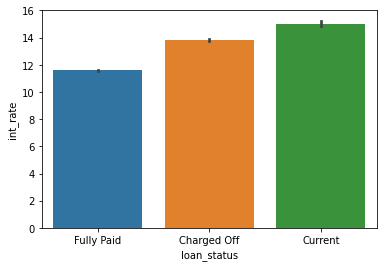

In [26]:
# Interest rate vs Loan Status
sns.barplot(x='loan_status',y='int_rate',data=loan_df_1)
plt.show()
#As we can see in below graph, Interest rate seems to be playing a signoficant role in case of defaulters.

Charged Off: 
36    3227
60    2400
Name: term, dtype: int64
Fully Paid: 
36    25868
60     7081
Name: term, dtype: int64


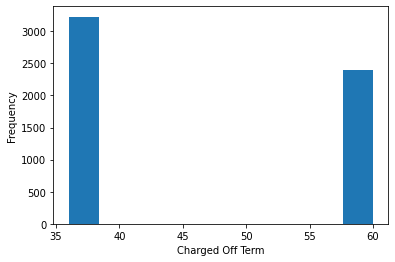

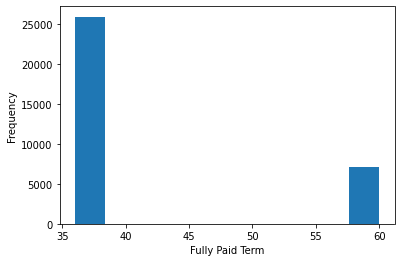

In [27]:
# Term vs Loan Status
print(f"Charged Off: \n{charged_off_df['term'].value_counts()}")
print(f"Fully Paid: \n{fully_paid_df['term'].value_counts()}")

plt.hist(charged_off_df['term'])
plt.xlabel('Charged Off Term')
plt.ylabel('Frequency')
plt.show()

plt.hist(fully_paid_df['term'])
plt.xlabel('Fully Paid Term')
plt.ylabel('Frequency')
plt.show()

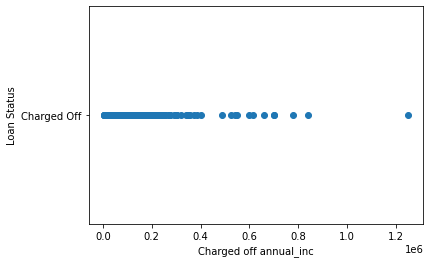

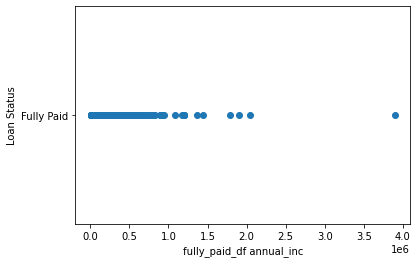

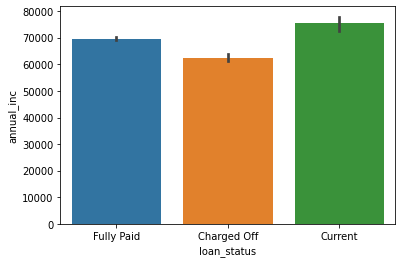

In [28]:
# Annual income
plt.scatter(charged_off_df['annual_inc'], charged_off_df['loan_status'])
plt.xlabel('Charged off annual_inc')
plt.ylabel('Loan Status')
plt.show()
plt.scatter(fully_paid_df['annual_inc'], fully_paid_df['loan_status'])
plt.xlabel('fully_paid_df annual_inc')
plt.ylabel('Loan Status')
plt.show()
sns.barplot(x='loan_status',y='annual_inc',data=loan_df_1)
plt.show()
#There's a significant dip in annual income for Charged off customers.

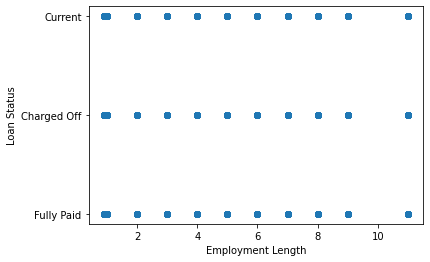

Charged Off Data: 
11.00    1331
0.90      639
2.00      567
3.00      555
4.00      462
5.00      458
1.00      456
6.00      307
7.00      263
8.00      203
9.00      158
Name: emp_length_num, dtype: int64
Fully Paid Data: 
11.00    7156
0.90     3869
2.00     3724
3.00     3457
4.00     2880
5.00     2736
1.00     2713
6.00     1861
7.00     1448
8.00     1232
9.00     1068
Name: emp_length_num, dtype: int64


In [29]:
#Employment length vs Loan Status
plt.scatter(loan_df_1['emp_length_num'], loan_df_1['loan_status'])
plt.xlabel('Employment Length')
plt.ylabel('Loan Status')
plt.show()
print(f"Charged Off Data: \n{charged_off_df['emp_length_num'].value_counts()}")
print(f"Fully Paid Data: \n{fully_paid_df['emp_length_num'].value_counts()}")

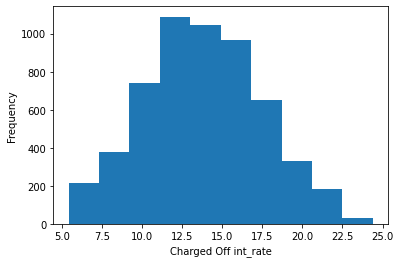

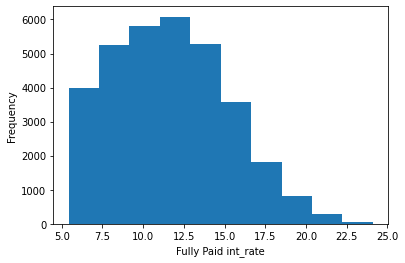

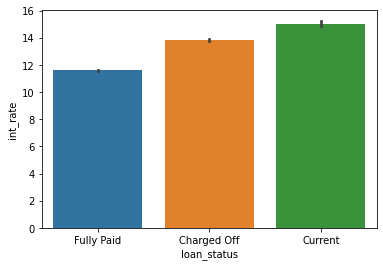

In [30]:
# Interest rate
plt.hist(charged_off_df['int_rate'])
plt.xlabel('Charged Off int_rate')
plt.ylabel('Frequency')
plt.show()

plt.hist(fully_paid_df['int_rate'])
plt.xlabel('Fully Paid int_rate')
plt.ylabel('Frequency')
plt.show()
sns.barplot(x='loan_status',y='int_rate',data=loan_df_1)
plt.show()
#Significant increase in interest rate

In [31]:
#Using derived column low income
print(f"Overall Data: \n{loan_df_1['low_income'].value_counts()}")
print(f"Charged Off Data: \n{charged_off_df['low_income'].value_counts()}")
print(f"Fully Paid Data: \n{fully_paid_df['low_income'].value_counts()}")

Overall Data: 
True     33517
False     6199
Name: low_income, dtype: int64
Charged Off Data: 
True     4983
False     644
Name: low_income, dtype: int64
Fully Paid Data: 
True     27615
False     5334
Name: low_income, dtype: int64


In [32]:
print(f"Charged Off Data: \n{charged_off_df['grade'].value_counts()}")
print(f"Fully Paid Data: \n{fully_paid_df['grade'].value_counts()}")

Charged Off Data: 
B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: grade, dtype: int64
Fully Paid Data: 
B    10250
A     9443
C     6486
D     3967
E     1948
F      657
G      198
Name: grade, dtype: int64


In [33]:
print(f"Charged Off Data: \n{charged_off_df['sub_grade'].describe()}")
print(f"Fully Paid Data: \n{fully_paid_df['sub_grade'].describe()}")
print(f"Charged Off Data: \n{charged_off_df['sub_grade'].value_counts()}")
print(f"Fully Paid Data: \n{fully_paid_df['sub_grade'].value_counts()}")

Charged Off Data: 
count     5627
unique      35
top         B5
freq       356
Name: sub_grade, dtype: object
Fully Paid Data: 
count     32949
unique       35
top          A4
freq       2695
Name: sub_grade, dtype: object
Charged Off Data: 
B5    356
B3    341
C1    336
B4    329
C2    321
D2    271
C3    270
D3    256
B2    228
A5    217
D4    215
C4    212
D5    209
C5    208
E1    198
A4    178
B1    171
D1    167
E2    163
E4    126
E3    119
E5    109
A3    103
F1     91
A2     74
F2     70
F5     54
F4     53
F3     51
G1     31
A1     30
G2     28
G3     19
G4     13
G5     10
Name: sub_grade, dtype: int64
Fully Paid Data: 
A4    2695
A5    2498
B3    2484
B5    2259
B4    2108
B2    1773
C1    1718
A3    1707
B1    1626
C2    1610
A2    1434
C3    1218
A1    1109
D2    1015
C4     994
C5     946
D3     860
D1     764
D4     703
D5     625
E1     524
E2     451
E3     397
E4     298
E5     278
F1     214
F2     163
F3     123
F4      98
G1      63
F5      59
G2      49
G4      

In [34]:
print(f"Charged Off Data: \n{charged_off_df['verification_status'].value_counts()}")
print(f"Fully Paid Data: \n{fully_paid_df['verification_status'].value_counts()}")

Charged Off Data: 
Not Verified       2142
Verified           2051
Source Verified    1434
Name: verification_status, dtype: int64
Fully Paid Data: 
Not Verified       14552
Verified           10155
Source Verified     8242
Name: verification_status, dtype: int64


Charged Off Data: 
count   5627.00
mean      14.00
std        6.59
min        0.00
25%        9.05
50%       14.29
75%       19.29
max       29.85
Name: dti, dtype: float64
Fully Paid Data: 
count   32949.00
mean       13.15
std         6.68
min         0.00
25%         7.98
50%        13.20
75%        18.39
max        29.99
Name: dti, dtype: float64


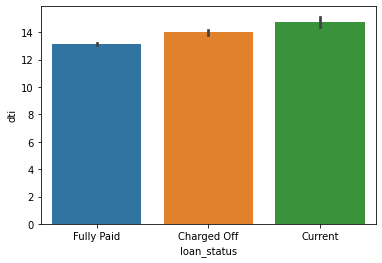

In [35]:
print(f"Charged Off Data: \n{charged_off_df['dti'].describe()}")
print(f"Fully Paid Data: \n{fully_paid_df['dti'].describe()}")
sns.barplot(x='loan_status',y='dti',data=loan_df_1)
plt.show()
# There seems to be a slight increase in DTI for charged off customers. Since the number is not significantly large, we can explore for other factors which do make a significant impact

In [36]:
print(f"Charged Off Data: \n{charged_off_df['delinq_2yrs'].value_counts()}")
print(f"Fully Paid Data: \n{fully_paid_df['delinq_2yrs'].value_counts()}")

Charged Off Data: 
0    4936
1     507
2     130
3      35
4      13
5       3
7       1
6       1
8       1
Name: delinq_2yrs, dtype: int64
Fully Paid Data: 
0     29449
1      2700
2       543
3       177
4        47
5        18
6         9
7         3
11        1
9         1
8         1
Name: delinq_2yrs, dtype: int64


In [37]:
print(f"Charged Off Data: \n{charged_off_df['earliest_cr_line'].describe()}")
print(f"Fully Paid Data: \n{fully_paid_df['earliest_cr_line'].describe()}")
print(f"Charged Off Data: \n{charged_off_df['earliest_cr_line'].value_counts()}")
print(f"Fully Paid Data: \n{fully_paid_df['earliest_cr_line'].value_counts()}")

Charged Off Data: 
count       5627
unique       421
top       Nov-98
freq          58
Name: earliest_cr_line, dtype: object
Fully Paid Data: 
count      32949
unique       520
top       Oct-99
freq         328
Name: earliest_cr_line, dtype: object
Charged Off Data: 
Nov-98    58
Apr-00    57
Jan-00    55
Dec-97    52
Nov-99    49
          ..
Feb-67     1
Nov-82     1
Jan-81     1
Jun-80     1
Aug-81     1
Name: earliest_cr_line, Length: 421, dtype: int64
Fully Paid Data: 
Oct-99    328
Nov-98    299
Oct-00    294
Dec-98    293
Nov-00    275
         ... 
Sep-65      1
Jun-66      1
Dec-63      1
Mar-68      1
Sep-56      1
Name: earliest_cr_line, Length: 520, dtype: int64


In [38]:
print(f"Charged Off Data: \n{charged_off_df['open_acc'].describe()}")
print(f"Fully Paid Data: \n{fully_paid_df['open_acc'].describe()}")

Charged Off Data: 
count   5627.00
mean       9.18
std        4.53
min        2.00
25%        6.00
50%        8.00
75%       12.00
max       38.00
Name: open_acc, dtype: float64
Fully Paid Data: 
count   32949.00
mean        9.29
std         4.38
min         2.00
25%         6.00
50%         9.00
75%        12.00
max        44.00
Name: open_acc, dtype: float64


In [39]:
print(f"Charged Off Data: \n{charged_off_df['pub_rec'].value_counts()}")
print(f"Fully Paid Data: \n{fully_paid_df['pub_rec'].value_counts()}")

Charged Off Data: 
0    5160
1     457
2      10
Name: pub_rec, dtype: int64
Fully Paid Data: 
0    31346
1     1556
2       38
3        7
4        2
Name: pub_rec, dtype: int64


In [40]:
print(f"Charged Off Data: \n{charged_off_df['total_acc'].value_counts()}")
print(f"Fully Paid Data: \n{fully_paid_df['total_acc'].value_counts()}")

Charged Off Data: 
14    231
16    223
17    205
15    200
11    198
     ... 
74      1
70      1
66      1
58      1
2       1
Name: total_acc, Length: 65, dtype: int64
Fully Paid Data: 
15    1218
17    1206
20    1204
16    1201
18    1192
      ... 
87       1
71       1
80       1
72       1
77       1
Name: total_acc, Length: 80, dtype: int64


Charged Off Data: 
count   5611.00
mean      55.57
std       27.91
min        0.00
25%       34.40
50%       58.40
75%       79.00
max       99.90
Name: revol_util, dtype: float64
Fully Paid Data: 
count   32915.00
mean       47.53
std        28.28
min         0.00
25%        23.90
50%        47.60
75%        70.80
max        99.90
Name: revol_util, dtype: float64


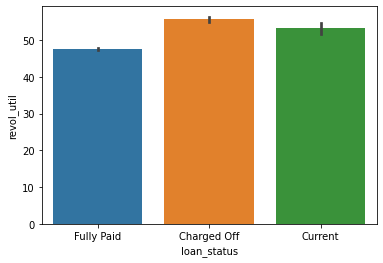

In [41]:
print(f"Charged Off Data: \n{charged_off_df['revol_util'].describe()}")
print(f"Fully Paid Data: \n{fully_paid_df['revol_util'].describe()}")
sns.barplot(x='loan_status',y='revol_util',data=loan_df_1)
plt.show()
#Significant increase in case of defaulters

Charged Off Data: 
count   5627.00
mean       3.12
std        2.18
min        0.07
25%        1.41
50%        2.60
75%        4.32
max       12.81
Name: interest_to_income, dtype: float64
Fully Paid Data: 
count   32949.00
mean        2.17
std         1.66
min         0.00
25%         0.94
50%         1.72
75%         2.95
max        14.12
Name: interest_to_income, dtype: float64


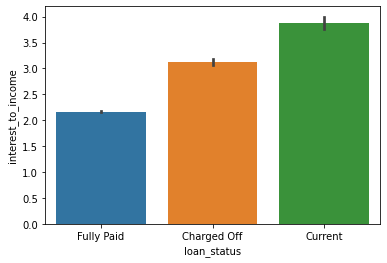

In [42]:
print(f"Charged Off Data: \n{charged_off_df['interest_to_income'].describe()}")
print(f"Fully Paid Data: \n{fully_paid_df['interest_to_income'].describe()}")
sns.barplot(x='loan_status',y='interest_to_income',data=loan_df_1)
plt.show()

Charged Off Data: 
count   5627.00
mean     336.18
std      217.05
min       22.79
25%      168.56
50%      293.87
75%      457.84
max     1305.19
Name: installment, dtype: float64
Fully Paid Data: 
count   32949.00
mean      320.13
std       207.08
min        15.69
25%       165.27
50%       275.66
75%       420.74
max      1295.21
Name: installment, dtype: float64


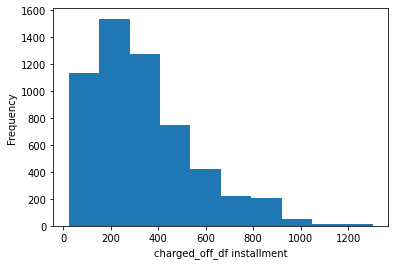

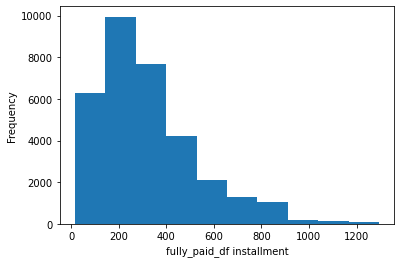

In [43]:
# installment
print(f"Charged Off Data: \n{charged_off_df['installment'].describe()}")
print(f"Fully Paid Data: \n{fully_paid_df['installment'].describe()}")

plt.hist(charged_off_df['installment'])
plt.xlabel('charged_off_df installment')
plt.ylabel('Frequency')
plt.show()

plt.hist(fully_paid_df['installment'])
plt.xlabel('fully_paid_df installment')
plt.ylabel('Frequency')
plt.show()

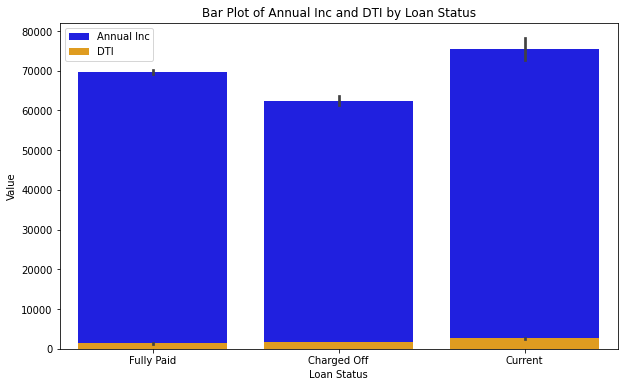

In [44]:
# Set the figure size
plt.figure(figsize=(10, 6))
# Create the bar plot
sns.barplot(x='loan_status', y='annual_inc', data=loan_df_1, color='blue', label='Annual Inc')
sns.barplot(x='loan_status', y='annual_int_amnt', data=loan_df_1, color='orange', label='DTI')

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Value')
plt.title('Bar Plot of Annual Inc and DTI by Loan Status')

# Add a legend
plt.legend()

# Show the plot
plt.show()

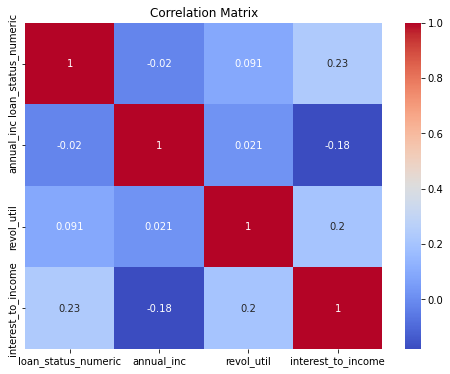

In [53]:
loan_df_subset = loan_df_1[['loan_status_numeric', 'annual_inc', 'revol_util', 'interest_to_income']]

corr_matrix = loan_df_subset.corr()

# Create heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()